In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
import numpy as np
import re
from numpy import linalg as LA
from time import time
from scipy import sparse
import matplotlib.pyplot as plt

/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'color'
  
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'color'
  if __name__ == '__main__':
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: The following kwargs were not used by contour: 'color'
  # Remove the CWD from sys.path while we load stuff.
/home/neo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'color'
  # This is added back by InteractiveShellApp.init_path()


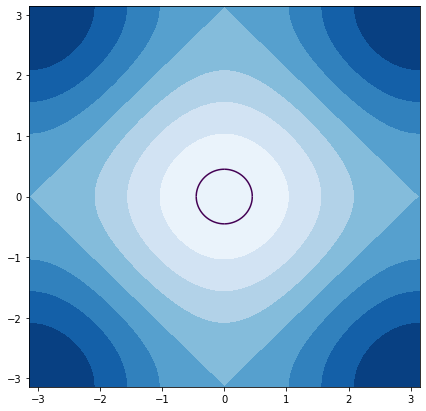

In [225]:
N=100
kx=np.linspace(0,np.pi,N)
ky=np.linspace(0,np.pi,N)
plt.rcParams['figure.figsize'] = [7,7]
Kx,Ky=np.meshgrid(kx,ky)
E=-2*(np.cos(Kx)+np.cos(Ky))
E_F=-3.8
CS=plt.contour(kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,ky,E,levels=[E_F],color='red')
plt.contour(-kx,-ky,E,levels=[E_F],color='red')
plt.contour(kx,-ky,E,levels=[E_F],color='red')
plt.contourf(kx,ky,E,cmap='Blues')
plt.contourf(-kx,ky,E,cmap='Blues')
plt.contourf(-kx,-ky,E,cmap='Blues')
plt.contourf(kx,-ky,E,cmap='Blues')
F = CS.collections[0].get_paths()[0]
coordsF = F.vertices
vF = np.dstack([2*np.sin(coordsF[:,0]),2*np.sin(coordsF[:,1])])[0]
vFmag = vF[:,0]*vF[:,0]+vF[:,1]*vF[:,1]
shatF  = vF/np.transpose([vFmag])
thetaF0 =  np.float64(np.arctan((vF[:,1]+1e-2)/(vF[:,0]+1e-2))) 
coordsFx_irr = coordsF[:,0]
coordsFy_irr = coordsF[:,1]
Lambda0=np.pi/(np.sqrt(2))#np.pi/(np.sqrt(2))
steps=30000 #30000
eps=(1-1/(N*N)) #0.9999
lambdaF=Lambda0*eps**np.linspace(0,steps-1,steps)
ThetaF,LambdaF=np.meshgrid(thetaF0,lambdaF)
Fwvfx_out = coordsFx_irr+LambdaF*np.cos(ThetaF)
Fwvfy_out = coordsFy_irr+LambdaF*np.sin(ThetaF)
EFwvf=-2*(np.cos(Fwvfx_out)+np.cos(Fwvfy_out))

In [226]:
EFwvfAvg=np.sum(EFwvf,axis=1)/len(thetaF0)

In [227]:
J=np.zeros(steps)
J_0=20
J[0]=J_0/(N*N)
k=0
for i in range(len(lambdaF)-1):
    Ek=(EFwvfAvg[i]-E_F)
    if(Ek-J[0]/4>0):
        if(Ek-J[i]/4.>0):
            J[i+1]=J[i]+4*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*Ek
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break
    else:
        if(Ek-J[i]/4<0):
            J[i+1]=J[i]+2*np.pi*np.sqrt(0.2)*J[i]*(1/((Ek)**2-J[i]**2/16))*J[i]*(Ek)
        else:
            Jfixed=4*Ek
            k=i
            J[i:]=4*Ek
            break       
        

In [228]:
J[k]

16.738797816125086

In [229]:
Jfixed,k

(16.738797816125086, 387)

In [230]:
Temp=10000**np.linspace(-0.7,1,100)

In [231]:
Temp

array([1.58489319e-03, 1.85646544e-03, 2.17457173e-03, 2.54718569e-03,
       2.98364724e-03, 3.49489670e-03, 4.09374901e-03, 4.79521496e-03,
       5.61687746e-03, 6.57933225e-03, 7.70670414e-03, 9.02725178e-03,
       1.05740759e-02, 1.23859492e-02, 1.45082878e-02, 1.69942902e-02,
       1.99062704e-02, 2.33172199e-02, 2.73126372e-02, 3.19926714e-02,
       3.74746317e-02, 4.38959288e-02, 5.14175183e-02, 6.02279359e-02,
       7.05480231e-02, 8.26364624e-02, 9.67962619e-02, 1.13382350e-01,
       1.32810473e-01, 1.55567614e-01, 1.82224203e-01, 2.13448413e-01,
       2.50022906e-01, 2.92864456e-01, 3.43046929e-01, 4.01828193e-01,
       4.70681656e-01, 5.51333195e-01, 6.45804416e-01, 7.56463328e-01,
       8.86083700e-01, 1.03791459e+00, 1.21576178e+00, 1.42408317e+00,
       1.66810054e+00, 1.95393040e+00, 2.28873736e+00, 2.68091366e+00,
       3.14028957e+00, 3.67837977e+00, 4.30867200e+00, 5.04696512e+00,
       5.91176513e+00, 6.92474907e+00, 8.11130831e+00, 9.50118507e+00,
      

In [232]:
Tk=(EFwvfAvg-E_F).max()*lambdaF[k]/Lambda0
Tk

4.1784189388452875

In [322]:
#Temp=np.linspace(0.01,10000,10000)
Chi=np.zeros(len(Temp))*0.0
factor=1#25
Tk=(EFwvfAvg-E_F).max()*lambdaF[k]/Lambda0
Tkondo=Tk*factor
Ek=np.linspace(-4,4,10000)#np.linspace(-4,4,45500)*factor
FD=np.zeros(100)
print(Tkondo)
for i in range(len(Temp)):
    T=Temp[i]
    omega=Ek/T
    FD=1/(np.exp(omega)+1)
    Chi[i]=(2/Tkondo)*np.sum(-(1/(np.pi))*(FD*(omega/(omega**2+1)**2))*((Ek[1]-Ek[0])/T))

4.1784189388452875


In [323]:
1/np.pi

0.3183098861837907

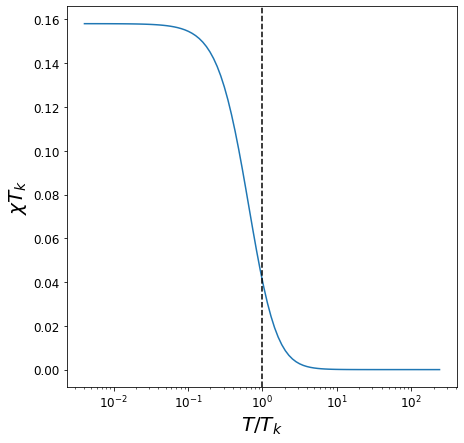

In [324]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tkondo,Chi*Tkondo)
ax.set_xlabel(r'$T/T_{k}$',fontsize=20)
ax.set_ylabel(r'$\chi T_{k}$',fontsize=20)
ax.tick_params(labelsize='large')
ax.axvline(x=1,linestyle='--',color='k')

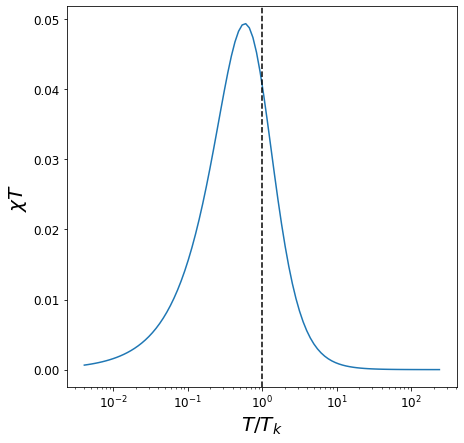

In [326]:
figure,ax=plt.subplots(1)
ax.set_xscale('log')
ax.plot(Temp/Tkondo,Chi*Temp)
ax.set_xlabel(r'$T/T_{k}$',fontsize=20)
ax.set_ylabel(r'$\chi T$',fontsize=20)
ax.tick_params(labelsize='large')
ax.axvline(x=1,linestyle='--',color='k')

$f=\frac{1}{\exp(\omega)+1}, \omega=\frac{\epsilon}{k_{B}T}$, $\frac{df}{d\omega}=-\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}$, $\frac{d^{2}f}{d\omega^{2}}=-\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}+2\frac{\exp(2\omega)}{(1+\exp(\omega))^{3}}$,<br>
$d\omega = -\frac{\omega}{T}dT$ , $\frac{d}{dT}=-\frac{\omega}{T}\frac{d}{d\omega}$, $\frac{d^{2}}{dT^{2}}=\frac{\omega^{2}}{T^{2}}\frac{d}{d\omega}+\frac{\omega}{T^{2}}\frac{d}{d\omega}+\frac{\omega^{2}}{T^{2}}\frac{d^{2}}{d\omega^{2}}$ <br>
$\frac{d^{2}f}{dT^{2}}=\frac{\omega^{2}}{T^{2}}\frac{df}{d\omega}+\frac{\omega}{T^{2}}\frac{df}{d\omega}+\frac{\omega^{2}}{T^{2}}\frac{d^{2}f}{d\omega^{2}}=-2\frac{\omega^{2}}{T^{2}}\frac{\exp(\omega)}{1+\exp(\omega)}f-\frac{\omega}{T^{2}}\frac{\exp(\omega)}{(1+\exp(\omega))^{2}}+\frac{2\omega^{2}}{T^{2}}\frac{\exp(2\omega)}{(1+\exp(\omega))^{3}}$<br>

0.016982436524617447
9.206751729735284


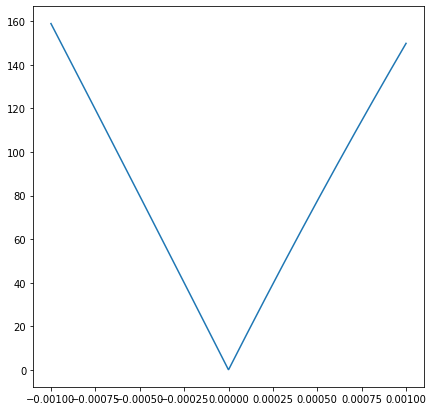

In [319]:
#Temp=np.linspace(0.02,10,1000)
Temp=1000**np.linspace(-0.59,1,100)
print(Temp[0])
gamma=np.zeros(len(Temp))*0.0
factor=1#25
Tkondo=(Tk)*factor
Ek=np.linspace(-0.001,0.001,1000)*factor
for i in range(1):
    T=Temp[i+0]
    omega=Ek/T
    FD_T2=-2*((omega*omega)/T**2-omega/T**2)*(np.exp(omega)/((1+np.exp(omega))*(1+np.exp(omega))))+2*((omega*omega)/T**2)*np.exp(2*omega)/((1+np.exp(omega))*(1+np.exp(omega))*(1+np.exp(omega)))   
    arctan=np.arctan(1/omega)
#plt.plot(Temp,FD_T2)
integral= np.trapz(FD_T2*arctan, dx=(Ek[1]-Ek[0])/T)
print(integral)
plt.plot(Ek,arctan*FD_T2)

In [317]:
omega

array([-5.88843655e-03, -5.87664789e-03, -5.86485923e-03, -5.85307057e-03,
       -5.84128191e-03, -5.82949324e-03, -5.81770458e-03, -5.80591592e-03,
       -5.79412726e-03, -5.78233860e-03, -5.77054994e-03, -5.75876127e-03,
       -5.74697261e-03, -5.73518395e-03, -5.72339529e-03, -5.71160663e-03,
       -5.69981797e-03, -5.68802930e-03, -5.67624064e-03, -5.66445198e-03,
       -5.65266332e-03, -5.64087466e-03, -5.62908599e-03, -5.61729733e-03,
       -5.60550867e-03, -5.59372001e-03, -5.58193135e-03, -5.57014269e-03,
       -5.55835402e-03, -5.54656536e-03, -5.53477670e-03, -5.52298804e-03,
       -5.51119938e-03, -5.49941072e-03, -5.48762205e-03, -5.47583339e-03,
       -5.46404473e-03, -5.45225607e-03, -5.44046741e-03, -5.42867874e-03,
       -5.41689008e-03, -5.40510142e-03, -5.39331276e-03, -5.38152410e-03,
       -5.36973544e-03, -5.35794677e-03, -5.34615811e-03, -5.33436945e-03,
       -5.32258079e-03, -5.31079213e-03, -5.29900347e-03, -5.28721480e-03,
       -5.27542614e-03, -

In [313]:
np.abs(omega).min()

5.894330884440155e-05

In [314]:
(Ek[1]-Ek[0])/T

0.0001178866176888031

In [315]:
T

0.016982436524617447